# 캐글 Bike Sharing Demand 예측 모델

[Kaggle 홈페이지 링크 - Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/overview)

시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해서 자전거 대여량을 예측해봅시다!

## 데이터 가져오기

데이터는 `/data` 폴더에 있습니다. 가져와봅시다.

In [2]:
import pandas as pd
import os

file_path = os.path.dirname(os.path.abspath('__file__'))

train = pd.read_csv(file_path + r'/data/train.csv')
test = pd.read_csv(file_path + r'/data/test.csv')

In [3]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
train.shape

(10886, 12)

In [5]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [6]:
test.shape

(6493, 9)

## `datetime` 칼럼을 `datetime` 자료형으로 변환하고 연, 월, 일 시, 분, 초까지 6가지 칼럼 생성하기

먼저 `to_datetime`을 이용해 datetime 자료형으로 바꿔봅시다.

In [8]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [9]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

`dtype : datetime64`라고 하니, 잘 바뀐 것 같죠? 이제 연, 월, 일, 시, 분, 초까지 6가지 칼럼을 생성합시다.

In [12]:
train['year'] = pd.DatetimeIndex(train['datetime']).year # 연
train['month'] = pd.DatetimeIndex(train['datetime']).month #월
train['day'] = pd.DatetimeIndex(train['datetime']).day #일
train['hour'] = pd.DatetimeIndex(train['datetime']).hour #시
train['minute'] = pd.DatetimeIndex(train['datetime']).minute #분
train['second'] = pd.DatetimeIndex(train['datetime']).second # 초

train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


## `year`, `month`, `day`, `hour`, `minute`, `second` 데이터 개수 시각화하기

`sns.countplot`을 활용해서 시각화해봅시다.

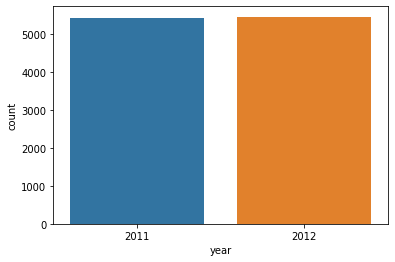

In [41]:
import seaborn as sns

sns.countplot(data=train, x="year")

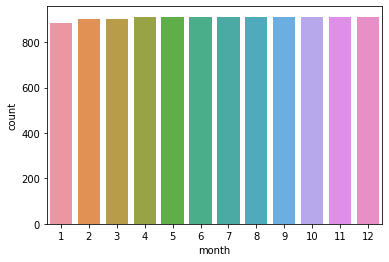

In [15]:
sns.countplot(train['month'])

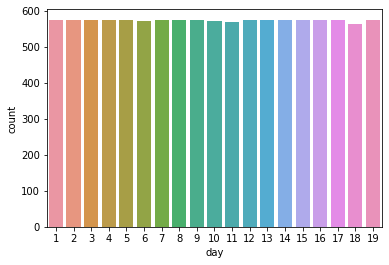

In [16]:
sns.countplot(train['day'])

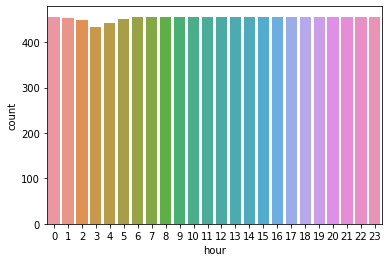

In [17]:
sns.countplot(train['hour'])

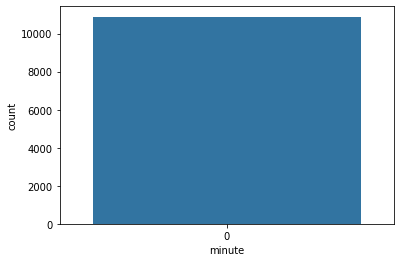

In [18]:
sns.countplot(train['minute'])

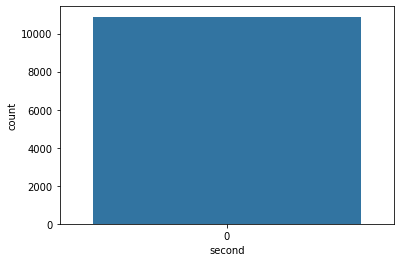

In [19]:
sns.countplot(train['second'])

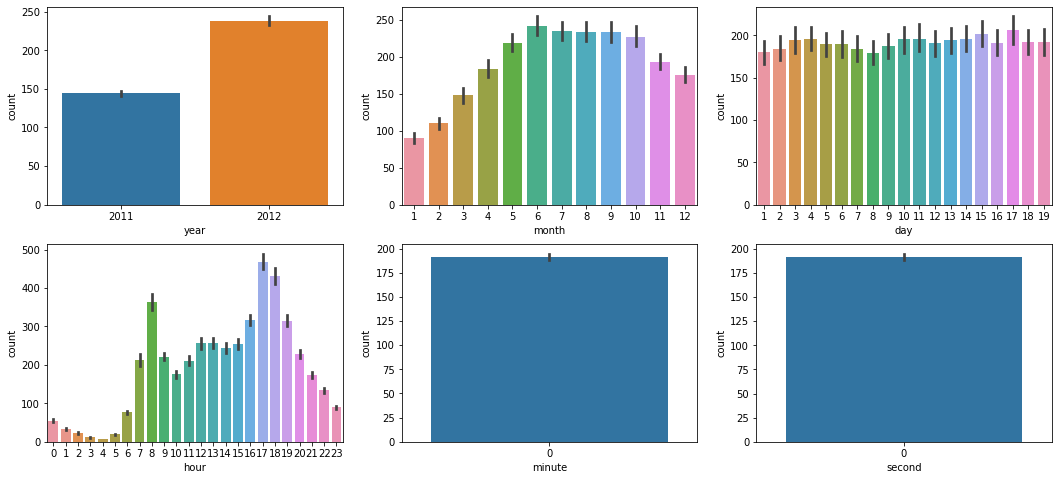

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

#sns.countplot(data=train, x="year", ax=ax1)
sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

minute와 second 변수는 필요없을 것 같네요! year와 month, day, hour만 남겨두도록 합시다.

In [43]:
new_train = train[["year", "month", "day", "hour"]]
new_train

,year,month,day,hour
0,2011,1,1,0
1,2011,1,1,1
2,2011,1,1,2
3,2011,1,1,3
4,2011,1,1,4
...,...,...,...,...
10881,2012,12,19,19
10882,2012,12,19,20
10883,2012,12,19,21
10884,2012,12,19,22


In [35]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


모든 칼럼을 하나하나 확인해볼까요?

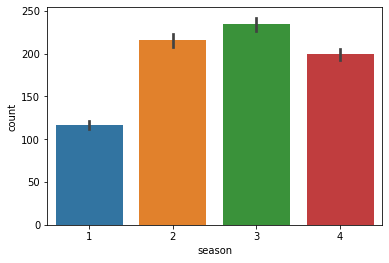

In [39]:
sns.barplot(data=train, x='season', y='count')

봄인지 여름인지 가을인지 겨울인지에 따라 값이 달라질 것 같네요. season 칼럼도 추가해줍시다!

In [45]:
new_train['season'] = train['season']
new_train

/home/aiffel0039/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,hour,season
0,2011,1,1,0,1
1,2011,1,1,1,1
2,2011,1,1,2,1
3,2011,1,1,3,1
4,2011,1,1,4,1
...,...,...,...,...,...
10881,2012,12,19,19,4
10882,2012,12,19,20,4
10883,2012,12,19,21,4
10884,2012,12,19,22,4


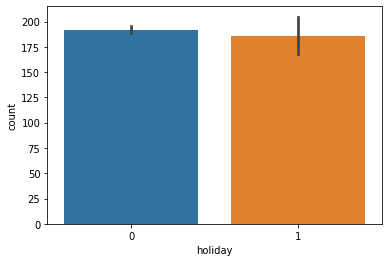

In [42]:
sns.barplot(data=train, x='holiday', y='count')

연휴인지 아닌지는 크진 않지만 영향이 있을 것 같군요! 일단 추가해줍시다.

In [46]:
new_train['holiday'] = train['holiday']
new_train

/home/aiffel0039/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,hour,season,holiday
0,2011,1,1,0,1,0
1,2011,1,1,1,1,0
2,2011,1,1,2,1,0
3,2011,1,1,3,1,0
4,2011,1,1,4,1,0
...,...,...,...,...,...,...
10881,2012,12,19,19,4,0
10882,2012,12,19,20,4,0
10883,2012,12,19,21,4,0
10884,2012,12,19,22,4,0


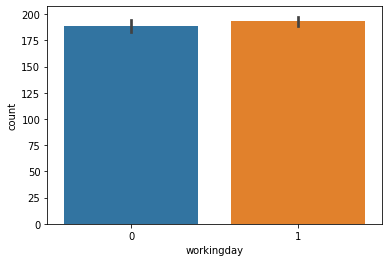

In [48]:
sns.barplot(data=train, x='workingday', y='count')

workingday도 추가해주도록 합시다.

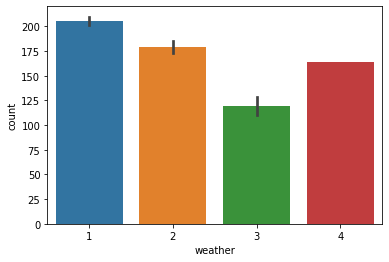

In [50]:
sns.barplot(data=train, x="weather", y="count")

날씨도 추가해줍시다!

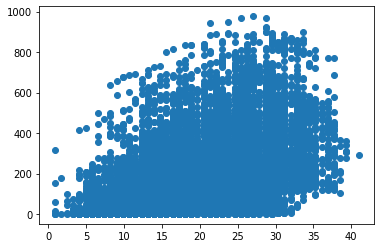

In [52]:
plt.scatter(data=train, x="temp", y="count")

온도 데이터도 추가해주는 것이 좋겠네요!

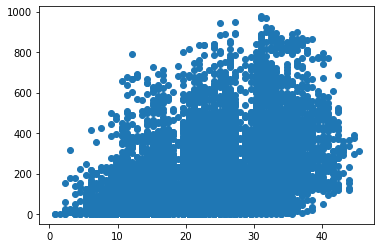

In [53]:
plt.scatter(data=train, x="atemp", y="count")

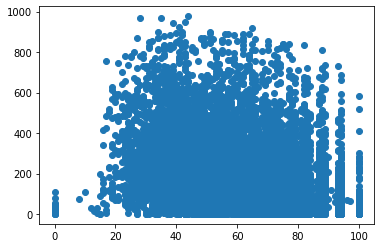

In [54]:
plt.scatter(data=train, x="humidity", y="count")

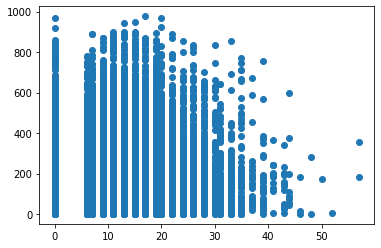

In [55]:
plt.scatter(data=train, x="windspeed", y="count")

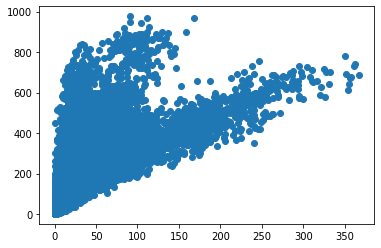

In [56]:
plt.scatter(data=train, x="casual", y="count")

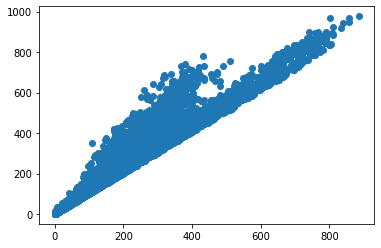

In [57]:
plt.scatter(data=train, x="registered", y="count")

train 데이터에서 minute, datetime, second 칼럼만 빼고 그대로 넣어주면 될 것같네요!

In [59]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

## x, y 칼럼 선택 및 train/test 데이터 분리

그럼 minute와 datetime, second 칼럼만 빼고 학습 데이터를 만들어줍시다.

train 데이터와 마찬가지로 test 데이터도 이렇게 만들어주어야겠죠?

In [60]:
new_df = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']]

In [61]:
y = train['count']

In [62]:
new_df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,2011,1,1,9


In [63]:
y.head(10)

0    16
1    40
2    32
3    13
4     1
5     1
6     2
7     3
8     8
9    14
Name: count, dtype: int64

In [64]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [67]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [68]:
test['datetime']

0      2011-01-20 00:00:00
1      2011-01-20 01:00:00
2      2011-01-20 02:00:00
3      2011-01-20 03:00:00
4      2011-01-20 04:00:00
               ...        
6488   2012-12-31 19:00:00
6489   2012-12-31 20:00:00
6490   2012-12-31 21:00:00
6491   2012-12-31 22:00:00
6492   2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: datetime64[ns]

In [72]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

del test['datetime']
test.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
5,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5
6,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6
7,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7
8,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8
9,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9


In [76]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [77]:
new_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day',
       'hour'],
      dtype='object')

train에는 있는 casual column과 registered 칼럼이 없습니다. 쿨하게 한번 버려볼까요? ㅎㅎ

In [78]:
new_train = new_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]

In [80]:
import numpy as np

X = np.array(new_train)
y = np.array(y)

이제 우리의 train 데이터에서 validation set과 train set을 구분해봅시다.

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size = 0.2
)

print(X_train.shape)
print(X_test.shape)

(8708, 12)
(2178, 12)


In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

19945.370053753755

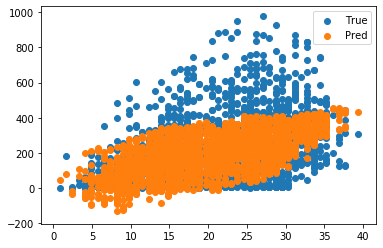

In [87]:
# temp를 기준으로 시각화
plt.scatter(X_test[:, 4], y_test, label="True")
plt.scatter(X_test[:, 4], y_pred, label="Pred")
plt.legend()
plt.show()

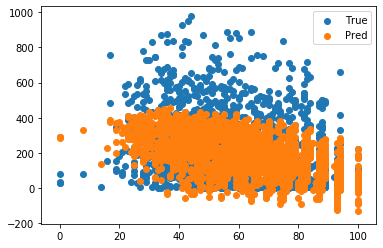

In [88]:
# humidity를 기준으로 시각화
plt.scatter(X_test[:, 6], y_test, label="True")
plt.scatter(X_test[:, 6], y_pred, label="Pred")
plt.legend()
plt.show()